# Approach One - Based on the Book "Hands-On Transef Learning"

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display
import soundfile as sf
import glob
import random

# define the path relative to the notebook source
# expected data structure
# -----------------------------------------------
# project root
#  src
#    main.ipynb
#  data
#   original
#     audio
#       fold1
#         *.wav
#       fold2,
#         *.wav
#     metadata
#      UrbanSound8K.csv

DATA_PATH = "../data/original/"
META_FILE = "{0}{1}".format(DATA_PATH,"metadata/UrbanSound8k.csv")
# Read the metadata
metaData = pd.read_csv(META_FILE,sep = ',',header=0,names=['FileName','fsID','start','end','salience','fold',
    'ClassID', 'Class'], usecols=[0,6,7])

# grab the full paths of all sample files
paths = glob.glob("{0}/audio/**/*".format(DATA_PATH))
# create a dataframe
sounds = [] 
for path in paths:
    fn = os.path.basename(path)
    meta = metaData[metaData.FileName == fn]
    audio = sf.SoundFile(path)
    sounds.append((meta.ClassID.values[0] , meta.Class.values[0],meta.FileName.values[0], audio.channels, 
        audio.samplerate,audio.frames,audio.format, round(audio.frames/audio.samplerate,1),
        audio.subtype,path))
df = pd.DataFrame(sounds,columns=['ClassID','Class','FileName','Channels','SampleRate','Frames','Format',
                                  'Length','SubType','Path'])
df.head(20)

,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
0,3,dog_bark,101415-3-0-2.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-2.wav
1,3,dog_bark,101415-3-0-3.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-3.wav
2,3,dog_bark,101415-3-0-8.wav,1,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold1\101415-3-0-8.wav
3,3,dog_bark,102106-3-0-0.wav,2,44100,72324,WAV,1.6,PCM_16,../data/original//audio\fold1\102106-3-0-0.wav
4,6,gun_shot,102305-6-0-0.wav,2,44100,115101,WAV,2.6,PCM_16,../data/original//audio\fold1\102305-6-0-0.wav
5,3,dog_bark,102842-3-0-1.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-0-1.wav
6,3,dog_bark,102842-3-1-0.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-0.wav
7,3,dog_bark,102842-3-1-5.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-5.wav
8,3,dog_bark,102842-3-1-6.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold1\102842-3-1-6.wav
9,7,jackhammer,103074-7-0-0.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold1\103074-7-0-0.wav


In [21]:
sampleDf=df.groupby('Class',as_index = False,group_keys=False).apply(lambda s: s.sample(1,replace=True))
sampleDf.head(10)


,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
4368,0,air_conditioner,55018-0-0-145.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold4\55018-0-0-145.wav
5366,1,car_horn,72259-1-9-5.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold5\72259-1-9-5.wav
3995,2,children_playing,177756-2-0-4.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold4\177756-2-0-4.wav
2372,3,dog_bark,4201-3-1-0.wav,2,44100,12348,WAV,0.3,PCM_16,../data/original//audio\fold2\4201-3-1-0.wav
8693,4,drilling,81117-4-0-3.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold9\81117-4-0-3.wav
7344,5,engine_idling,156358-5-0-6.wav,2,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold8\156358-5-0-6.wav
4425,6,gun_shot,7064-6-4-0.wav,2,44100,58653,WAV,1.3,PCM_16,../data/original//audio\fold4\7064-6-4-0.wav
4610,7,jackhammer,104998-7-7-4.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold5\104998-7-7-4.wav
8223,8,siren,159748-8-0-8.wav,2,48000,192000,WAVEX,4.0,PCM_24,../data/original//audio\fold9\159748-8-0-8.wav
6276,9,street_music,101848-9-0-8.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold7\101848-9-0-8.wav


In [22]:
# function to get start and end indices for audio sub-sample
def windows(data, window_size):
 start = 0
 while start < len(data):
  yield int(start), int(start + window_size)
  start += (window_size / 2)

In [15]:
data =[1,2,3,4,5,6]
wg = windows(data,2)
for i in wg:
    print(i)

(0, 2)
(1, 3)
(2, 4)
(3, 5)
(4, 6)
(5, 7)


class:  ndarray
shape:  (256, 173)
strides:  (1384, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x276b2109150
byteorder:  little
byteswap:  False
type: float64


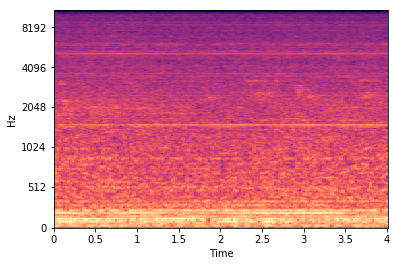

In [23]:
p = sampleDf.Path.values[0]
sample, r = sf.read(p)
y = librosa.resample(sample.T, r, 22050)
y = librosa.to_mono(y)
mel_spec = librosa.feature.melspectrogram(y=y,n_mels=256,hop_length=512)
np.info(mel_spec)
_ = librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
y_harmonic, y_percussive =librosa.effects.hpss(y)
IPython.display.Audio(p)

In [17]:
from keras import backend as K
d = np.asarray(data)
ddd = K.concatenate( [d,d,d], axis=-1 )
ddd

AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

class:  ndarray
shape:  (128, 173)
strides:  (1384, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x276b2062f00
byteorder:  little
byteswap:  False
type: float64


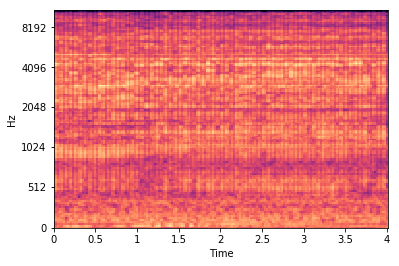

In [24]:
p2 = sampleDf.Path.values[7]
sample2, r2 = sf.read(p2)
y2 = librosa.resample(sample2.T, r2, 22050)
y2 = librosa.to_mono(y2)
mel_spec2 = librosa.feature.melspectrogram(y=y2)
mfcc2 = librosa.feature.mfcc(y2, n_mfcc=40)
np.info(mel_spec2)
p = librosa.display.specshow(librosa.power_to_db(mel_spec2, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p2)

In [ ]:
mfcc1 = librosa.feature.mfcc(y, n_mfcc=40)
mfcc2 = librosa.feature.mfcc(y2, n_mfcc=40)

In [ ]:
np.info(mfcc1)
np.info(mfcc2)

In [ ]:
#frame length in msec
getSamplingParams(sampling_rate=22050,bands=64, frame_lenght=80, frame_shift=10):
  n_fft = int(frame_lenght / 1000 * sampling_rate)
  hop_length = int(frame_shift / 1000 * sampling_rate)

        

In [26]:
a,b = extract_features([sampleDf.Path.values[0]])
print("shape a: {0}, shape b: {1}".format(np.shape(a),np.shape(b)))

Path: ../data/original//audio\fold4\55018-0-0-145.wav window #: 1 Start: 0 End: 32256 Smaple langth: 32256
log_specgrams_full shape: (1, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold4\55018-0-0-145.wav window #: 2 Start: 16128 End: 48384 Smaple langth: 32256
log_specgrams_full shape: (2, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold4\55018-0-0-145.wav window #: 3 Start: 32256 End: 64512 Smaple langth: 32256
log_specgrams_full shape: (3, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold4\55018-0-0-145.wav window #: 4 Start: 48384 End: 80640 Smaple langth: 32256
log_specgrams_full shape: (4, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold4\55018-0-0-145.wav window #: 5 Start: 64512 End: 96768 Smaple langth: 23688
Path: ../data/original//audio\fold4\55018-0-0-145.wav window #: 6 Start: 80640 End: 112896 Smaple langth: 7560
shape a: (4, 64, 64, 3), shape b: (4,)


In [36]:
a[0][0]

array([[ 1.11291141e+01, -7.88291868e-01, -5.03722476e+00],
       [ 1.53197651e+01, -2.30768647e-02, -5.03722476e+00],
       [ 1.31086882e+01, -1.60677162e+00, -5.03722476e+00],
       [ 1.71173450e+01, -1.08096705e+00, -5.03722476e+00],
       [-5.48404662e+00, -1.86363104e+01, -5.03722476e+00],
       [-1.68826087e+01, -2.85899770e+01, -5.03862614e+00],
       [-1.86333562e+01, -3.09578736e+01, -4.20401731e+00],
       [-1.12266255e+01, -2.32134781e+01, -2.43892205e+00],
       [-2.01484538e+01, -3.21324414e+01, -4.82029213e-01],
       [-1.78574579e+01, -2.98275435e+01,  7.79280608e-01],
       [-1.78022615e+01, -2.99460099e+01,  8.09171607e-01],
       [-9.36162562e+00, -2.14060564e+01, -1.65030662e-01],
       [-1.71130614e+01, -3.00313150e+01,  1.91498787e-02],
       [-7.85266871e+00, -2.03089818e+01, -5.09414786e-01],
       [-1.26679039e+01, -2.44569516e+01, -2.11204252e+00],
       [-2.44871924e+01, -3.62313758e+01, -2.45343022e+00],
       [-1.78333227e+01, -3.02997650e+01

In [33]:
from IPython.core.debugger import set_trace
# windowSize - sample window size in milliseconds
# dimention - dimention of a "band by frame" square

# function to get start and end indices for audio sub-sample
def windows(data, window_size):
 start = 0
 while start < len(data):
  yield int(start), int(start + window_size)
  start += (window_size / 2)
    
#This procesure samples the audio file generates log-scaled mel spectrogram for each sample and labels the samples
# it reurns to array. The first is N "dimention x dimention" log-scaled mel spectorgam band/ frame matrixes.
# The second output value is a vector of labels fo each row in in the firs array
#
# windowSize - sample window size in milliseconds
# dimention - dimention of a "band by frame" square
# sampleRate - sample rate
#
# Example
#
# extractFeatures('test.wav', windowSize = 500, dimention = 96)
def extractFeatures(paths,  sampleRate = 22050,windowSize = 1000, dimention = 64  ):
    hop_length =  int(windowSize/1000 * sampleRate/(dimention - 1))
    window_size = hop_length * (dimention - 1)
    #print("hop lenght: {0}, window size: {1}".format(hop_length,window_size))
    log_specgrams_full = []
    class_labels = []
    # for each audio sample
    for path in paths:
        #set_trace()
        sound_data, sr = sf.read(path)
        sound_data = librosa.resample(sound_data.T, sr, sampleRate)
        sound_data = librosa.to_mono(sound_data)
        soundSize = len(sound_data) - 1
        if (soundSize < window_size):
            continue
        file_name = path.split('\\')[-1]
        class_label =  file_name.split('-')[1]
        # for each audio signal sub-sample window of data
        for (start,end) in windows(sound_data, window_size):
            sample_size = len(sound_data[start:end]);
            tooSmall = sample_size < window_size
            if(tooSmall): # for the last slice get a wnow_size piece from the audo file end
                signal = sound_data[(soundSize-window_size):soundSize]
            else: 
                 signal = sound_data[start:end]
                
            #print("Path: {0} window #: {1} Smaple length: {2}".format(path,count, len(signal)))
            # get the log-scaled mel-spectrogram
            melspec_full = librosa.feature.melspectrogram(signal,n_mels = dimention, 
                                                        sr = sampleRate, hop_length=hop_length)
            logspec_full = librosa.amplitude_to_db(melspec_full)
            logspec_full = logspec_full.T.flatten()[:,np.newaxis].T
            log_specgrams_full.append(logspec_full)
            #print("log_specgrams_full shape: {0}. logspec_full shape: {1}".format(np.shape(log_specgrams_full),
            #        np.shape(logspec_full)))
            class_labels.append(class_label)
            if(tooSmall): #sample size
                break
    # create the first two feature maps
   # set_trace()
    feature = np.asarray(log_specgrams_full).reshape(len(log_specgrams_full), dimention,dimention, 1)
    feature = np.tile(feature,(1,1,1,3))
    return np.array(feature), np.array(class_labels, dtype = np.int)

In [35]:
aa,bb = extractFeatures([sampleDf.Path.values[0]],windowSize=500,dimention=92)
print("shape a: {0}, shape b: {1}".format(np.shape(aa),np.shape(bb)))


shape a: (16, 92, 92, 3), shape b: (16,)


In [ ]:
b


In [ ]:
from collections import Counter
Counter(b)

In [ ]:
z = zip(a,b)
za = np.array((list(z)))tooSmall 

In [ ]:
np.shape(za)

In [18]:
from keras.layers import *
class Spectrogram2VGGInput( Layer ) :
    """Custom conversion layer
    """
    def call( self, x ) :
        return  K.concatenate( [x,x,x], axis=-1 )
    def compute_output_shape( self, input_shape ) :
        return input_shape[:3] + (3,)


In [19]:
# VGG-16 code sample
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

vgg = VGG16(weights='imagenet', include_top=False, input_shape=(92,92,3))
vgg.trainable = False
spectrogramInput = Input( shape=(92,92,1), name='spectrogram' )
p = Spectrogram2VGGInput( name='spectogram_to_three_dimentional')(spectrogramInput)
tensor = vgg(p)
                                                                  

featureExtractor = Model( inputs=spectrogramInput, outputs=p)

featureExtractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spectrogram (InputLayer)     (None, 92, 92, 1)         0         
_________________________________________________________________
spectogram_to_three_dimentio (None, 92, 92, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
np.shape(train)

In [ ]:
np.shape(train[0][0])

In [ ]:
zae = np.expand_dims(za, axis=0)

In [ ]:
np.shape(zae)